In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from stats import dm_test

In [2]:
params = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_NORM_FINAL.csv')
params_t = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_STUD_FINAL.csv')

In [3]:
params.set_index(pd.to_datetime(params.iloc[:, 0]), inplace = True)
params = params.iloc[:, 1:]
params_t.set_index(pd.to_datetime(params_t.iloc[:, 0]), inplace = True)
params_t = params_t.iloc[:, 1:]

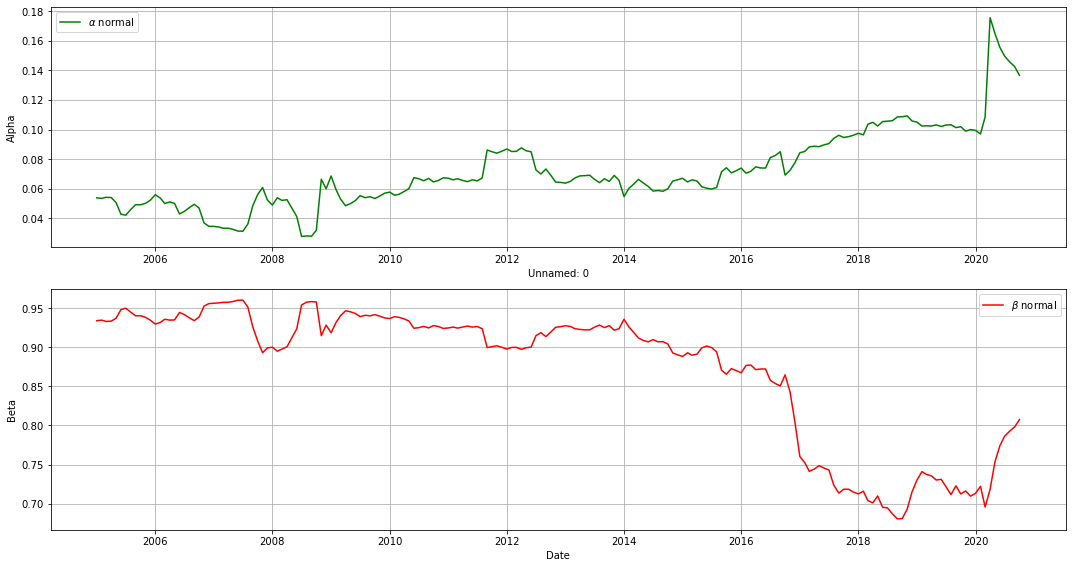

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

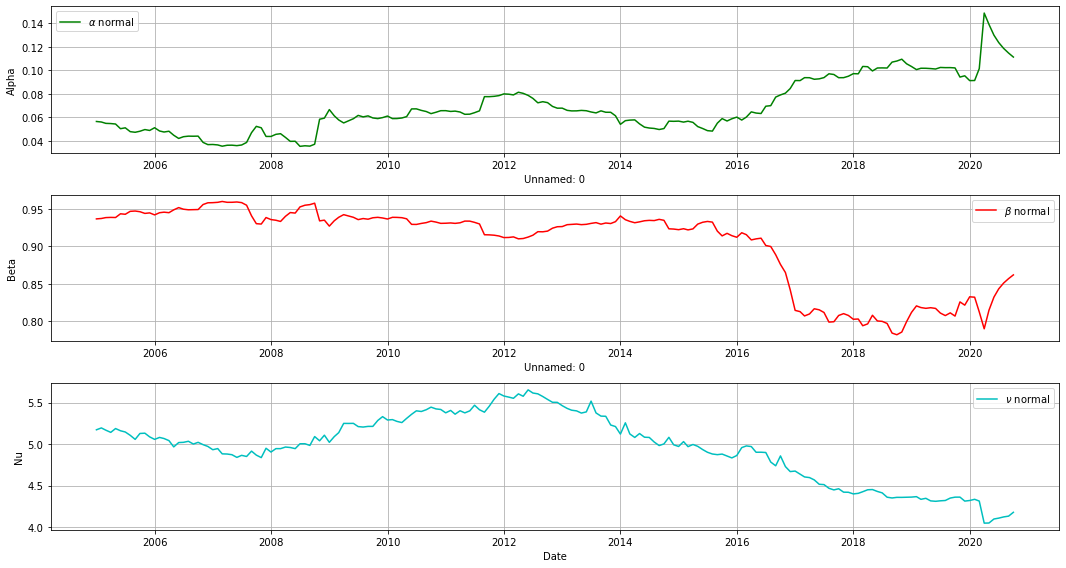

In [5]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params_t.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Nu, label = r'$\nu$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

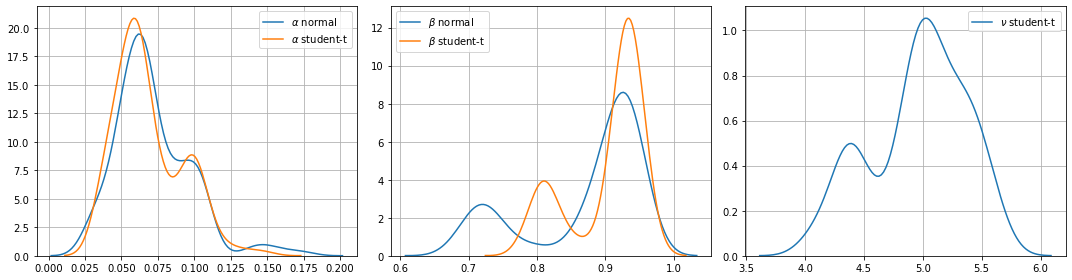

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [7]:
actual = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/MONTHLY_VOLATILITY_CALC.csv')
actual = actual.set_index(actual.iloc[:, 0])
actual = actual.iloc[:, 1:]

In [8]:
daily_act = actual.iloc[:-1, :] / np.sqrt(22)
monthly_avg = daily_act.mean(axis = 1)

In [9]:
pred1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_norm_dist.csv')
pred1 = pred1.T
pred1.columns = pred1.iloc[0, :].values
pred1 = pred1.iloc[1:, :]
pred1_avg = pred1.mean(axis = 1)

In [10]:
pred2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_t_dist.csv')
pred2 = pred2.T
pred2.columns = pred2.iloc[0, :].values
pred2 = pred2.iloc[1:, :]
pred2_avg = pred2.mean(axis = 1)

## DM test with MSE criterion:

In [11]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = 0)

(2.5848142005183714, 0.010496756455495141)

## DM test with QLIKE criterion:

In [12]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = -2)

(-2.917818957162368, 0.003952378271464045)

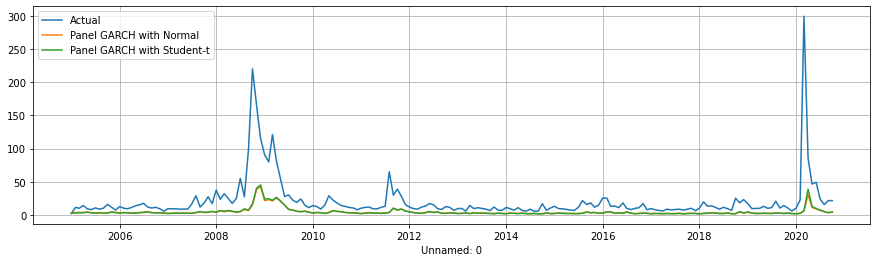

In [13]:
plt.figure(figsize = (15, 4))
sns.lineplot(pd.to_datetime(monthly_avg.index), monthly_avg, label = 'Actual')
sns.lineplot(pd.to_datetime(pred1_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
sns.lineplot(pd.to_datetime(pred2_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

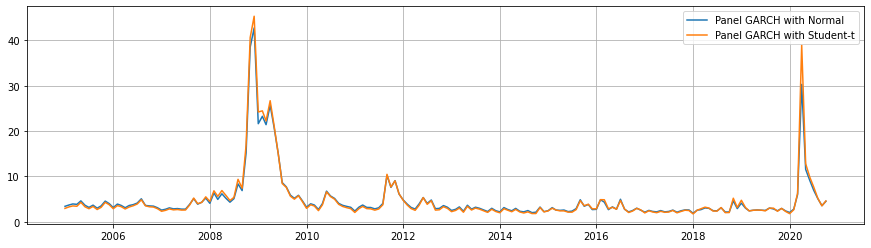

In [14]:
plt.figure(figsize = (15, 4))
sns.lineplot(pd.to_datetime(pred1_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
sns.lineplot(pd.to_datetime(pred2_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()